<a href="https://colab.research.google.com/github/Namesakenberg/machine_learning/blob/main/Wine_data_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [ ]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
df= pd.read_csv(wine_data_path)
df.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.isnull().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [ ]:
X = df.drop(columns = 'type')
y = df['type']

In [ ]:
print(X.shape)
print(y.shape)

(6463, 12)
(6463,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(5170, 12)
(1293, 12)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test , y_pred))

0.9891724671307038


# applying pca

In [ ]:
from sklearn.decomposition import PCA
pca= PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
print(accuracy_score(y_test , y_pred))

0.9891724671307038


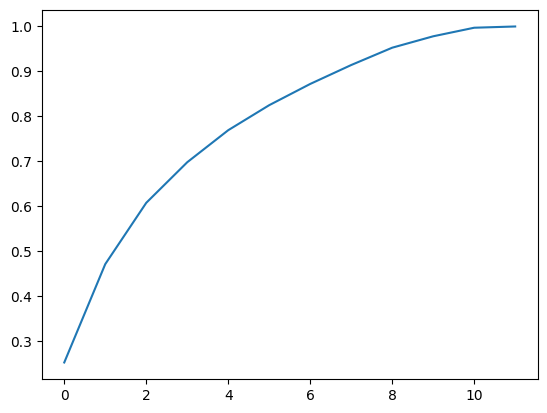

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca.explained_variance_ratio_))


In [ ]:
n_components_90 = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.9) + 1
print(n_components_90)

8


pca where n_components = 8

In [ ]:
from sklearn.decomposition import PCA
pca =PCA(n_components=8)
X_train_trf1= pca.fit_transform(X_train)
X_test_trf1= pca.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train_trf1,y_train)
y_pred = knn.predict(X_test_trf1)
print(accuracy_score(y_test , y_pred))

0.988399071925754


applying pca nad knn with n_components = 8 and n_neighbors = 7

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
scores = []
for i in range(1,16):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_trf1 , y_train)
  y_pred = knn.predict(X_test_trf1)
  acc = accuracy_score(y_test , y_pred)
  scores.append(acc)
best_k = scores.index(max(scores)) + 1
print("Best value of k is:", best_k)
print("Maximum accuracy is:",max(scores))

Best value of k is: 7
Maximum accuracy is: 0.9891724671307038


# hence
# n_components = 8
# n_neighbors = 7
# accuracy = 98.9 %